In [7]:
import datetime
import math
import pickle
import matplotlib.pyplot as plt
import numpy as np
import quandl
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
style.use('ggplot')

df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [9]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # Replace missing data points

forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(["label"], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

classifier = LinearRegression(n_jobs=10)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
forecast_set = classifier.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1096.99198013 1069.36044214 1015.30519824 1057.12778749 1070.12734054
 1070.47020445 1088.62468897 1108.35535433 1111.03236464 1118.65718849
 1127.43528968 1126.15168921 1145.76562669 1161.25094316 1132.73143352
 1118.84644958 1084.38409016 1099.30884409 1110.55141221 1118.56476286
 1131.45626    1146.52759426 1177.58979551 1182.10579504 1153.66822012
 1165.06194015 1166.93809451 1149.93958998 1115.48714564 1111.96260098
 1109.21503517 1066.57399738 1038.11673277 1070.12761861 1017.06823074] 0.9783906549078267 35


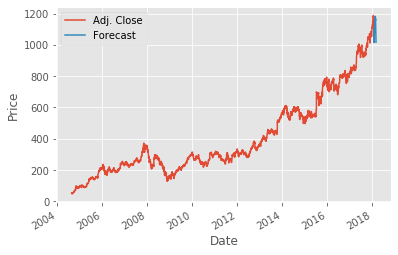

In [10]:
df['Forecast'] = np.nan

last_data = df.iloc[-1].name
last_unix = last_data.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()